# Manipulation de données avec Pandas

Nous allons ici apprendre à manipuler les données à l'aide de quelques fonctions simples. Comme d'habitude, la bonne manière d'apprendre à utiliser des fonctions est d'aller voir la documentation officielle.

In [1]:
import numpy as np
import pandas as pd
from string import ascii_letters

gen = np.random.default_rng() 

In [2]:
N = 10
df = pd.DataFrame(
    {
        ascii_letters[k]: gen.random((N,)) for k in range(10)
    }
)
display(df)

a         b         c         d         e         f         g  \
0  0.552471  0.186336  0.232999  0.691300  0.215900  0.959709  0.401737   
1  0.994395  0.667405  0.092259  0.884041  0.408340  0.082530  0.672483   
2  0.603862  0.275540  0.270706  0.467610  0.428413  0.122693  0.343539   
3  0.433404  0.758087  0.236242  0.415584  0.150552  0.284434  0.600490   
4  0.508484  0.552647  0.695872  0.520714  0.646665  0.882072  0.332341   
5  0.029747  0.620551  0.823244  0.517838  0.453717  0.462817  0.192247   
6  0.801647  0.109675  0.784687  0.285049  0.077791  0.006239  0.766440   
7  0.284771  0.273278  0.195870  0.820481  0.699811  0.672232  0.308453   
8  0.290554  0.953099  0.694126  0.020899  0.301850  0.051924  0.863041   
9  0.772566  0.314824  0.336454  0.165542  0.133359  0.296420  0.433210   

          h         i         j  
0  0.227259  0.784421  0.619481  
1  0.500585  0.594823  0.538976  
2  0.143962  0.565160  0.675955  
3  0.515930  0.995067  0.708568  
4  0.852696  0.867020  0.945997  
5  0.909549  0.854367  0.161121  
6  0.737216  0.232868  0.617650  
7  0.816567  0.171545  0.907959  
8  0.014618  0.980833  0.765010  
9  0.243955  0.249988  0.611712

## La fonction `map`

<div class="alert alert-block alert-info">
    Documentation de la fonction
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html">
        map
    </a>
</div>
    
La fonction `map` permet d'appliquer une fonction directement à une `Series` ou un `DataFrame` (ou une partie seulement) élément par élément. Evidemment, cette syntaxe est à éviter lorsqu'il est possible d'utiliser des fonctions vectorisées.

In [3]:
df10 = df.map(lambda x: int(10*x)) #.convert_dtypes()
display(df10)

a  b  c  d  e  f  g  h  i  j
0  5  1  2  6  2  9  4  2  7  6
1  9  6  0  8  4  0  6  5  5  5
2  6  2  2  4  4  1  3  1  5  6
3  4  7  2  4  1  2  6  5  9  7
4  5  5  6  5  6  8  3  8  8  9
5  0  6  8  5  4  4  1  9  8  1
6  8  1  7  2  0  0  7  7  2  6
7  2  2  1  8  6  6  3  8  1  9
8  2  9  6  0  3  0  8  0  9  7
9  7  3  3  1  1  2  4  2  2  6

Il est possible d'utiliser une fonction définie par un `def` et de faire passer ses arguments supplémentaires (obligatoires ou optionnels) en les donnant à la fonction `map` comme des arguments optionnels ! Voici un exemple.

In [4]:
def mafonction(x, k):
    return int(10**k*x)

dfk = df.map(mafonction, k=2)  #.astype(int)
display(dfk)

a   b   c   d   e   f   g   h   i   j
0  55  18  23  69  21  95  40  22  78  61
1  99  66   9  88  40   8  67  50  59  53
2  60  27  27  46  42  12  34  14  56  67
3  43  75  23  41  15  28  60  51  99  70
4  50  55  69  52  64  88  33  85  86  94
5   2  62  82  51  45  46  19  90  85  16
6  80  10  78  28   7   0  76  73  23  61
7  28  27  19  82  69  67  30  81  17  90
8  29  95  69   2  30   5  86   1  98  76
9  77  31  33  16  13  29  43  24  24  61

Il est également possible d'ignorer les `nan`.

In [8]:
dfnan = df.copy()
for _ in range(5):
    dfnan.iloc[gen.integers(0, N-1), gen.integers(0, N-1)] = pd.NA
display(dfnan)
dfk = dfnan.map(lambda x: int(100*x), na_action='ignore').convert_dtypes()
display(dfk)
print(dfk.dtypes)

a         b         c         d         e         f         g  \
0  0.552471  0.186336  0.232999  0.691300  0.215900  0.959709  0.401737   
1  0.994395  0.667405  0.092259  0.884041  0.408340       NaN  0.672483   
2  0.603862  0.275540  0.270706  0.467610  0.428413  0.122693       NaN   
3  0.433404  0.758087  0.236242  0.415584  0.150552  0.284434  0.600490   
4  0.508484       NaN  0.695872  0.520714  0.646665  0.882072  0.332341   
5  0.029747  0.620551  0.823244  0.517838  0.453717  0.462817  0.192247   
6       NaN  0.109675  0.784687  0.285049  0.077791  0.006239  0.766440   
7       NaN  0.273278  0.195870  0.820481  0.699811  0.672232  0.308453   
8  0.290554  0.953099  0.694126  0.020899  0.301850  0.051924  0.863041   
9  0.772566  0.314824  0.336454  0.165542  0.133359  0.296420  0.433210   

          h         i         j  
0  0.227259  0.784421  0.619481  
1  0.500585  0.594823  0.538976  
2  0.143962  0.565160  0.675955  
3  0.515930  0.995067  0.708568  
4  0.852696  0.867020  0.945997  
5  0.909549  0.854367  0.161121  
6  0.737216  0.232868  0.617650  
7  0.816567  0.171545  0.907959  
8  0.014618  0.980833  0.765010  
9  0.243955  0.249988  0.611712

a     b   c   d   e     f     g   h   i   j
0    55    18  23  69  21    95    40  22  78  61
1    99    66   9  88  40  <NA>    67  50  59  53
2    60    27  27  46  42    12  <NA>  14  56  67
3    43    75  23  41  15    28    60  51  99  70
4    50  <NA>  69  52  64    88    33  85  86  94
5     2    62  82  51  45    46    19  90  85  16
6  <NA>    10  78  28   7     0    76  73  23  61
7  <NA>    27  19  82  69    67    30  81  17  90
8    29    95  69   2  30     5    86   1  98  76
9    77    31  33  16  13    29    43  24  24  61

a    Int64
b    Int64
c    Int64
d    Int64
e    Int64
f    Int64
g    Int64
h    Int64
i    Int64
j    Int64
dtype: object


## La fonction `apply`

<div class="alert alert-block alert-info">
    Documentation de la fonction
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html">
        apply
    </a>
</div>

La fonction `apply` permet d'appliquer une fonction directement à une ou plusieurs colonnes d'un `DataFrame`. Cette fonction est à privilégier par rapport à `map` (pour éviter les boucles) ou à une écriture directe (pour les copies).

In [12]:
def power(x, k=0):
    return x**k
display(df.apply(power, k=-2))

a          b           c            d           e             f  \
0     3.276281  28.800883   18.420103     2.092508   21.453259      1.085727   
1     1.011304   2.245025  117.483955     1.279543    5.997291    146.818040   
2     2.742358  13.171374   13.645945     4.573327    5.448476     66.428942   
3     5.323714   1.740049   17.917790     5.790048   44.119121     12.360561   
4     3.867638   3.274190    2.065103     3.688095    2.391339      1.285261   
5  1130.100218   2.596836    1.475513     3.729164    4.857686      4.668535   
6     1.556085  83.135001    1.624078    12.307219  165.251217  25692.888034   
7    12.331295  13.390319   26.065485     1.485468    2.041918      2.212901   
8    11.845268   1.100839    2.075505  2289.508076   10.975309    370.907143   
9     1.675438  10.089394    8.833830    36.490858   56.228551     11.381124   

           g            h          i          j  
0   6.196061    19.362324   1.625179   2.605820  
1   2.211250     3.990660   2.826338   3.442398  
2   8.473188    48.250822   3.130811   2.188590  
3   2.773247     3.756803   1.009940   1.991760  
4   9.053817     1.375344   1.330275   1.117431  
5  27.057207     1.208782   1.369969  38.520842  
6   1.702330     1.839971  18.440839   2.621289  
7  10.510487     1.499740  33.981449   1.213017  
8   1.342572  4679.987267   1.039465   1.708698  
9   5.328465    16.802793  16.001565   2.672425

In [17]:
display(df.apply(np.sum))  # display(df.apply(np.sum, axis=0))
display(df.apply(np.sum, axis=1))

a    5.271902
b    4.711443
c    4.362459
d    4.789059
e    3.516399
f    3.821070
g    4.913981
h    4.962336
i    6.296093
j    6.552430
dtype: float64

0    4.871614
1    5.435838
2    3.897441
3    5.098358
4    6.804509
5    5.025199
6    4.419262
7    5.150967
8    4.935955
9    3.558030
dtype: float64

Il est également possible d'ajouter une ou plusieurs colonnes à un `DataFrame` en effectuant des calculs. Voici un exemple.

In [34]:
dfminmax = df.copy()
#dfminmax[['Min', 'Max']] = dfminmax.apply(
#    lambda x: [min(x), max(x)],
#    axis=1, result_type='expand'
#)
dfminmax[['Min', 'Max']] = dfminmax.apply(
    lambda x: pd.Series([min(x), max(x)]),
    axis=1
)
display(dfminmax)

a         b         c         d         e         f         g  \
0  0.552471  0.186336  0.232999  0.691300  0.215900  0.959709  0.401737   
1  0.994395  0.667405  0.092259  0.884041  0.408340  0.082530  0.672483   
2  0.603862  0.275540  0.270706  0.467610  0.428413  0.122693  0.343539   
3  0.433404  0.758087  0.236242  0.415584  0.150552  0.284434  0.600490   
4  0.508484  0.552647  0.695872  0.520714  0.646665  0.882072  0.332341   
5  0.029747  0.620551  0.823244  0.517838  0.453717  0.462817  0.192247   
6  0.801647  0.109675  0.784687  0.285049  0.077791  0.006239  0.766440   
7  0.284771  0.273278  0.195870  0.820481  0.699811  0.672232  0.308453   
8  0.290554  0.953099  0.694126  0.020899  0.301850  0.051924  0.863041   
9  0.772566  0.314824  0.336454  0.165542  0.133359  0.296420  0.433210   

          h         i         j       Min       Max  
0  0.227259  0.784421  0.619481  0.186336  0.959709  
1  0.500585  0.594823  0.538976  0.082530  0.994395  
2  0.143962  0.565160  0.675955  0.122693  0.675955  
3  0.515930  0.995067  0.708568  0.150552  0.995067  
4  0.852696  0.867020  0.945997  0.332341  0.945997  
5  0.909549  0.854367  0.161121  0.029747  0.909549  
6  0.737216  0.232868  0.617650  0.006239  0.801647  
7  0.816567  0.171545  0.907959  0.171545  0.907959  
8  0.014618  0.980833  0.765010  0.014618  0.980833  
9  0.243955  0.249988  0.611712  0.133359  0.772566

## La fonction `groupby`

<div class="alert alert-block alert-info">
    Documentation de la fonction
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html">
        groupby
    </a>
</div>

La fonction `groupby` permet de regrouper les éléments d'un `DataFrame` selon un critère (comme la même valeur sur une colonne) et d'appliquer une fonction à ces éléments. Cette fonction est très performante et doit être utilisée lorsque c'est possible plutôt que de créer des masques et de faire les opérations à la main.

Nous commençons par créer un faux jeu de données très petit afin de bien comprendre comment cette fonction s'utilise

In [41]:
data = pd.DataFrame(
    {
        'Catégorie': ['chien', 'chien', 'chat', 'chat', 'lapin', 'tortue', 'chat', 'chien', 'tortue', 'chien'],
        'Vitesse':   [36,      51,      45,     30,     40,      2.5,      42,     60,      3.1,      53],
        'Liberté':   [False,   False,   True,   False,  True,    False,    True,   False,   True,     False]
    }, index=list(ascii_letters[:10])
        
)
display(data)

Catégorie  Vitesse  Liberté
a     chien     36.0    False
b     chien     51.0    False
c      chat     45.0     True
d      chat     30.0    False
e     lapin     40.0     True
f    tortue      2.5    False
g      chat     42.0     True
h     chien     60.0    False
i    tortue      3.1     True
j     chien     53.0    False

On fabrique la `Serie` des vitesses moyennes de chaque catégorie d'animaux.

In [45]:
data.groupby("Catégorie")["Vitesse"].mean()

Catégorie
chat      39.0
chien     50.0
lapin     40.0
tortue     2.8
Name: Vitesse, dtype: float64

Il est possible d'ajouter un critère selon la colonne `Liberté`. Il s'agit alors d'une `Serie` mais avec un `MultiIndex`. 

In [52]:
dfg = data.groupby(["Catégorie", "Liberté"])["Vitesse"].mean()
display(dfg)
print(dfg.index)
print(dfg.at[('chien', False)])  # on accède à un élément à l'aide de l'index tuple
print(dfg.loc['chat'])           # avec le premier index, on obtient une Serie !

Catégorie  Liberté
chat       False      30.0
           True       43.5
chien      False      50.0
lapin      True       40.0
tortue     False       2.5
           True        3.1
Name: Vitesse, dtype: float64

MultiIndex([(  'chat', False),
            (  'chat',  True),
            ( 'chien', False),
            ( 'lapin',  True),
            ('tortue', False),
            ('tortue',  True)],
           names=['Catégorie', 'Liberté'])
50.0
Liberté
False    30.0
True     43.5
Name: Vitesse, dtype: float64


La fonction qui est utilisée après le `groupby` peut être
- `mean` pour calculer la moyenne de chaque groupe
- `sum` pour sommer les valeurs de chaque groupe
- `count` pour compter le nombre d'éléments de chaque groupe
- `apply` pour appliquer une fonction aux éléments de chaque groupe.

Un exemple simple est d'appliquer la fonction identité, ce qui permet juste de regrouper les termes selon un critère :

In [57]:
data.groupby("Catégorie").apply(lambda x: x, include_groups=False)

Vitesse  Liberté
Catégorie                    
chat      c     45.0     True
          d     30.0    False
          g     42.0     True
chien     a     36.0    False
          b     51.0    False
          h     60.0    False
          j     53.0    False
lapin     e     40.0     True
tortue    f      2.5    False
          i      3.1     True

In [58]:
data.groupby("Catégorie").count()

Vitesse  Liberté
Catégorie                  
chat             3        3
chien            4        4
lapin            1        1
tortue           2        2

## Manipulation de séries chronologiques

Une série chronologique est simplement une série dont les labels sont des temps. Un type particulier à `pandas` permet de gérer assez simplement les temps et de faire des opérations dessus. Les temps peuvent être gérés par le format `datetime64` de `numpy`.

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 80

gen = np.random.default_rng()

print(pd.__version__)
pd.options.mode.copy_on_write = True  # compatibilité avec pandas 3

2.2.3


In [2]:
instant1 = np.datetime64('2000-01-01')
instant2 = np.datetime64('now')
print(instant1, type(instant1))
print(instant2, type(instant2))
delta = instant2 - instant1
print(delta)
nbjours = delta / np.timedelta64(1, 'D')
nbheures= (delta - np.timedelta64(1, 'D')*nbjours) / np.timedelta64(1, 'h')
print(f"Depuis l'an 2000 : {nbjours:.0f} jours et {nbheures:.0f} heures")

2000-01-01 <class 'numpy.datetime64'>
2024-11-26T17:51:58 <class 'numpy.datetime64'>
785958718 seconds
Depuis l'an 2000 : 9097 jours et 18 heures


Il est ainsi possible de générer une suite de date/temps équi-répartis. Attention, le premier instant et le dernier sont inclus dans la série. L'aide de la fonction <a href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html">date_range</a>.
Pour fixer la fréquence, une liste d'alias est donnée sur cette <a href="https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases">page</a>.

In [3]:
dt = pd.date_range(np.datetime64('now'), periods=10, freq='D')
display(dt)

DatetimeIndex(['2024-11-26 17:51:59', '2024-11-27 17:51:59',
               '2024-11-28 17:51:59', '2024-11-29 17:51:59',
               '2024-11-30 17:51:59', '2024-12-01 17:51:59',
               '2024-12-02 17:51:59', '2024-12-03 17:51:59',
               '2024-12-04 17:51:59', '2024-12-05 17:51:59'],
              dtype='datetime64[ns]', freq='D')

Il est également possible de fabriquer des dates/temps à partir de chaines de caractères

In [4]:
df = pd.read_csv(
    "Liste_des_DC.csv", 
    sep=";", encoding='latin_1',
    names=["Année", "Naissance", "Décès", "Heure", "Sexe"]
)
df.drop(["Année", "Heure", "Sexe"], axis=1, inplace=True)
##### Attention, certaines dates sont mal rentrées !!! on les supprime
df["DofB"] = pd.to_datetime(df["Naissance"], format='%d/%m/%Y', errors='coerce')
df["DofD"] = pd.to_datetime(df["Décès"], format='%d/%m/%Y', errors='coerce')
mask = ~pd.isna(df["DofB"]) * ~pd.isna(df["DofD"])
df = df[mask]
df["Age"] = np.ceil((df["DofD"] - df["DofB"]) / np.timedelta64(365, 'D')).astype(int)
df.head(10)

Naissance       Décès       DofB       DofD  Age
0  24/09/1913  06/02/1999 1913-09-24 1999-02-06   86
1  28/08/1908  06/02/1999 1908-08-28 1999-02-06   91
2  17/08/1914  05/01/1999 1914-08-17 1999-01-05   85
3  04/01/1928  08/02/1999 1928-01-04 1999-02-08   72
4  30/06/1947  08/02/1999 1947-06-30 1999-02-08   52
5  26/12/1934  11/02/1999 1934-12-26 1999-02-11   65
6  26/12/1921  08/02/1999 1921-12-26 1999-02-08   78
7  09/03/1896  11/02/1999 1896-03-09 1999-02-11  103
8  05/05/1935  12/02/1999 1935-05-05 1999-02-12   64
9  20/04/1968  11/02/1999 1968-04-20 1999-02-11   31

On peut tracer des séries chronologiques très facilement !

In [14]:
temps = pd.date_range(start=np.datetime64("2020-01-01"), end=np.datetime64("now"), freq='ME')
N = temps.shape[0]
df = pd.Series(
    gen.random((N,)),
    index=temps
)
df.head()

2020-01-31    0.963764
2020-02-29    0.248267
2020-03-31    0.601944
2020-04-30    0.830916
2020-05-31    0.752670
Freq: ME, dtype: float64

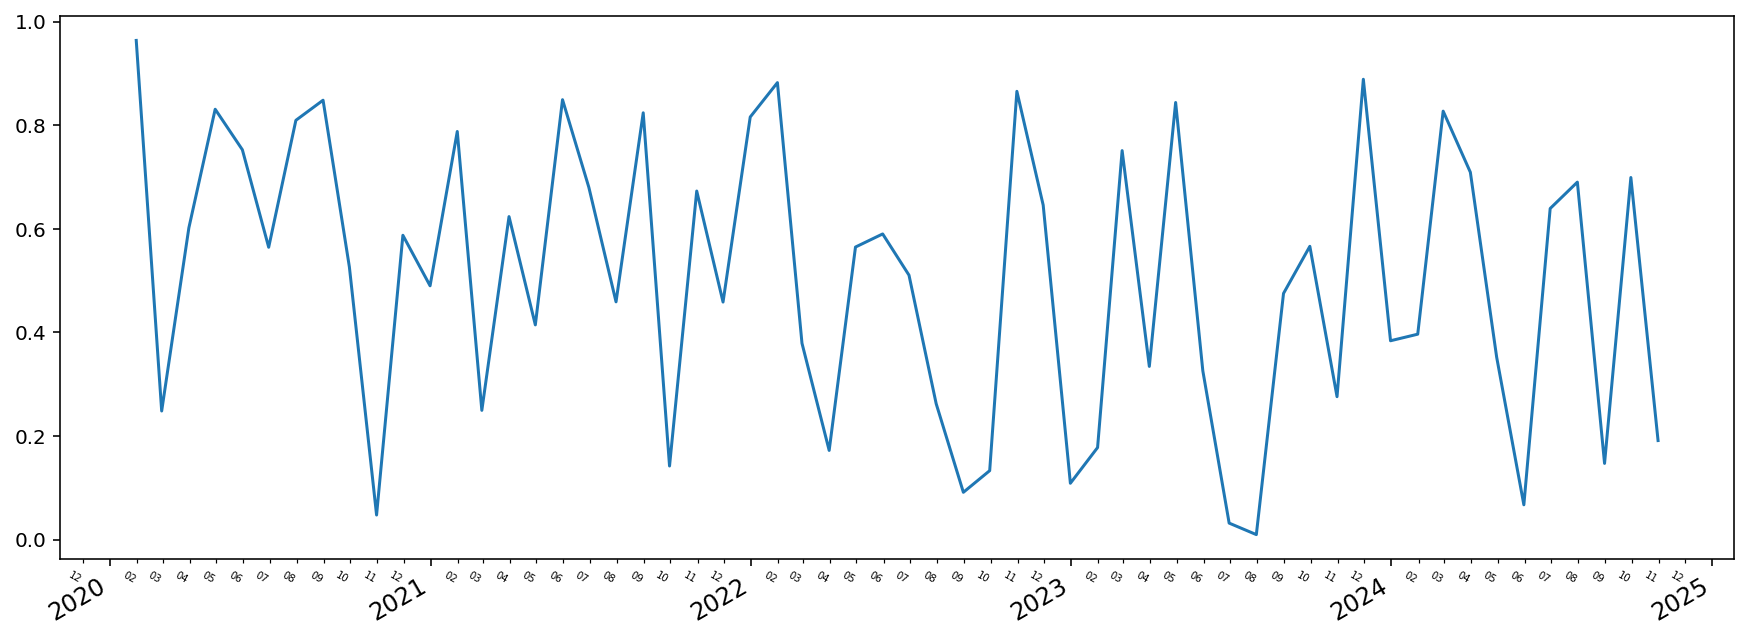

In [27]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df)
#ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right', fontsize=12)
for label in ax.get_xticklabels(which='minor'):
    label.set(rotation=-30, horizontalalignment='right', fontsize=5)